In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import RobustScaler, robust_scale, scale

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
outcome = df['Outcome']
df = df.drop(['Outcome'], axis=1)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


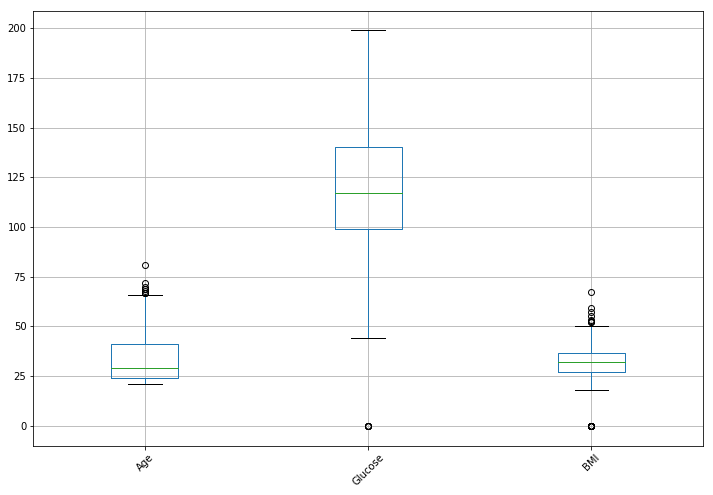

In [13]:
df.boxplot(column=['Age','Glucose', 'BMI'], figsize=(12,8),rot=45)
plt.show();

In [14]:
robust_scale_df = pd.DataFrame(robust_scale(df), columns=df.columns)

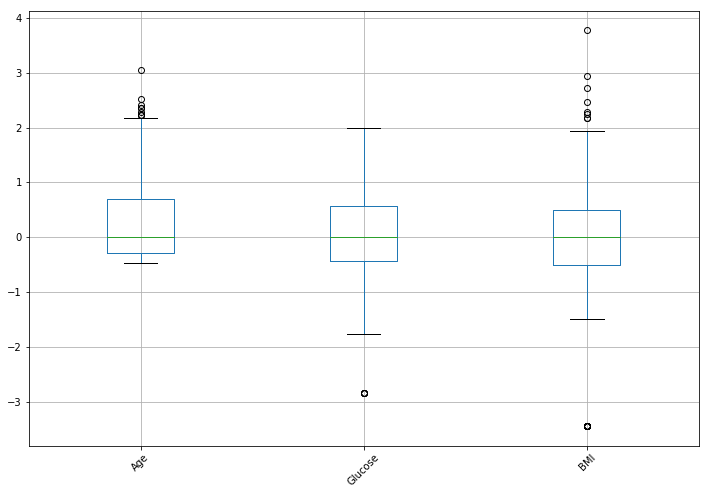

In [15]:
robust_scale_df.boxplot(column=['Age','Glucose', 'BMI'], figsize=(12,8),rot=45)
plt.show();

In [16]:
robust_scaler = RobustScaler(copy=True,
                            with_centering=True,
                            with_scaling=True)
robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

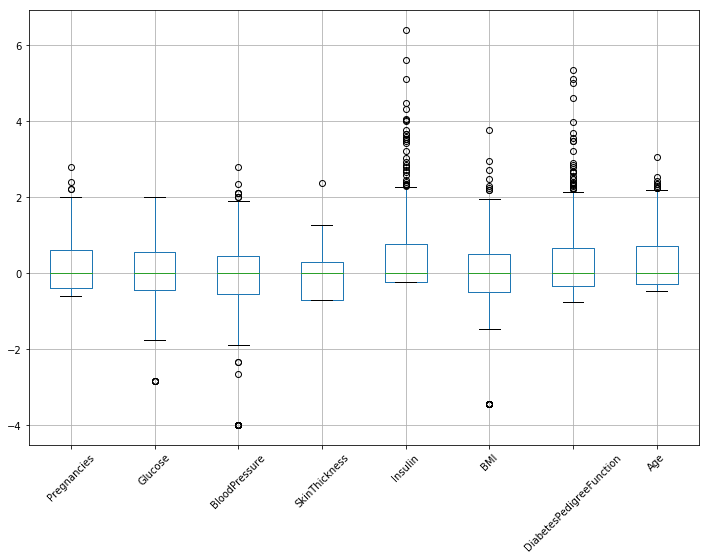

In [18]:
robust_scale_array = robust_scaler.fit_transform(df)
robust_scaler_df = pd.DataFrame(robust_scale_array, columns=df.columns)
robust_scale_df.boxplot(figsize=(12,8), rot=45)
plt.show();

In [23]:
robust_scale_df['Outcome'] = outcome

In [24]:
robust_scale_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


In [25]:
robust_scale_df.to_csv('robust_scale.csv', index=False)